In [1]:
import keras as k
import scipy
import pickle

from keras import optimizers
from sklearn.utils import shuffle


Using Theano backend.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json

from keras.models import Sequential
from keras.layers import Dense, Activation
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
home = '/home/nandhini/yundij/neural_network'
data_signature1 = 'fsize' + str(9)+'timestep'+str(0.3)
data_signature2 = 'fsize' + str(9)+'timestep'+str(0.4)
data_signature3 = 'fsize' + str(9)+'timestep'+str(0.35)


file_myData1 = "myData_vdrift"+data_signature1+".pickle"
file_myData2 = "myData_vdrift"+data_signature2+".pickle"
file_myData3 = "myData_vdrift"+data_signature3+".pickle"


file_target1 = "target_vdrift"+data_signature1+".pickle"
file_target2 = "target_vdrift"+data_signature2+".pickle"
file_target3 = "target_vdrift"+data_signature3+".pickle"



myData1 = pickle.load( open( file_myData1, "rb" ) )
myData2 = pickle.load( open( file_myData2, "rb" ) )
myData_test = pickle.load( open( file_myData3, "rb" ) )
myData_train = np.vstack((myData1, myData2))
                

target1 = pickle.load( open( file_target1, "rb" ) )
target2 = pickle.load( open( file_target2, "rb" ) )
target_test = pickle.load( open( file_target3, "rb" ) )
target_test = target_test.reshape(-1,1)

target_train = np.vstack((target1.reshape(-1,1),target2.reshape(-1,1)))

In [4]:
X_test, X_dev, y_test, y_dev = train_test_split(myData_test, target_test, test_size=0.2, random_state=42)

In [5]:
myData_train.shape, target_train.shape, X_dev.shape, y_dev.shape, X_test.shape, y_test.shape

((3869424, 190),
 (3869424, 1),
 (386943, 190),
 (386943, 1),
 (1547769, 190),
 (1547769, 1))

In [6]:
scaler = StandardScaler()
scaler.fit(myData_train)
pickle.dump( scaler, open( 'vdrift_scaler', "wb" ) )
X_train_norm = scaler.transform(myData_train)
X_dev_norm = scaler.transform(X_dev)
X_test_norm = scaler.transform(X_test)

y_train = target_train

X_train_norm, y_train = shuffle(X_train_norm, y_train, random_state=0)

In [7]:
#np.savetxt("drag_std.csv", scaler.std_, delimiter=",")
#np.savetxt("drag_mean.csv", scaler.mean_, delimiter=",")

In [8]:
X_train_norm.shape, X_dev_norm.shape, y_train.shape, y_dev.shape

((3869424, 190), (386943, 190), (3869424, 1), (386943, 1))

In [9]:
X_train_norm, y_train = shuffle(X_train_norm, y_train, random_state=0)

In [10]:
model = Sequential()
model.add(Dense(300, activation='relu', kernel_initializer='normal',input_dim=X_train_norm.shape[-1]))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.01)
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'vdrift_weights.hdf5'
#model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=False)
model.fit(X_train_norm, y_train, batch_size=512, epochs=15, verbose=1, validation_data=(X_dev_norm, y_dev), callbacks=[checkpointer])

Train on 3869424 samples, validate on 386943 samples
Epoch 1/15
3869424/3869424 [==============================] - 29s - loss: 72.9166 - val_loss: 79.2567
Epoch 2/15
3869424/3869424 [==============================] - 29s - loss: 67.5724 - val_loss: 77.9883
Epoch 3/15
3869424/3869424 [==============================] - 29s - loss: 65.8215 - val_loss: 77.5653
Epoch 4/15
3869424/3869424 [==============================] - 29s - loss: 64.7434 - val_loss: 76.9238
Epoch 5/15
3869424/3869424 [==============================] - 29s - loss: 63.9061 - val_loss: 76.7639
Epoch 6/15
3869424/3869424 [==============================] - 29s - loss: 63.2110 - val_loss: 76.3632
Epoch 7/15
3869424/3869424 [==============================] - 29s - loss: 62.6156 - val_loss: 76.8600
Epoch 8/15
3869424/3869424 [==============================] - 29s - loss: 62.1132 - val_loss: 76.8299
Epoch 9/15
3869424/3869424 [==============================] - 29s - loss: 61.6758 - val_loss: 76.3737
Epoch 10/15
3869424/3869424 [

In [11]:
model = Sequential()
model.add(Dense(300, activation='relu', kernel_initializer='normal',input_dim=7))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.01)
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'local_vdrift_weights.hdf5'
#model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=False)
model.fit(X_train_norm[:,92:99], y_train, batch_size=512, epochs=15, verbose=1, validation_data=(X_dev_norm[:,92:99], y_dev), callbacks=[checkpointer])

Train on 3869424 samples, validate on 386943 samples
Epoch 1/15
3869424/3869424 [==============================] - 18s - loss: 79.2016 - val_loss: 87.1078
Epoch 2/15
3869424/3869424 [==============================] - 18s - loss: 76.8444 - val_loss: 86.3063
Epoch 3/15
3869424/3869424 [==============================] - 18s - loss: 76.2506 - val_loss: 85.8615
Epoch 4/15
3869424/3869424 [==============================] - 18s - loss: 75.8697 - val_loss: 85.7552
Epoch 5/15
3869424/3869424 [==============================] - 19s - loss: 75.5952 - val_loss: 85.5257
Epoch 6/15
3869424/3869424 [==============================] - 19s - loss: 75.3829 - val_loss: 85.3689
Epoch 7/15
3869424/3869424 [==============================] - 19s - loss: 75.2122 - val_loss: 85.3397
Epoch 8/15
3869424/3869424 [==============================] - 19s - loss: 75.0651 - val_loss: 85.2637
Epoch 9/15
3869424/3869424 [==============================] - 19s - loss: 74.9379 - val_loss: 85.2151
Epoch 10/15
3869424/3869424 [

(0.58932705141499409, 0.0)


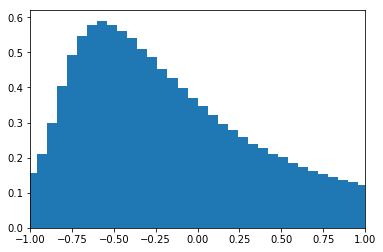

In [12]:
model = Sequential()
model.add(Dense(300, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'vdrift_weights.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_test.reshape(-1)
#pred = np.maximum(pred,0)
#pred = np.minimum(pred,1.5)
#a = real.copy()
#pred = pred[(a<10) & (a>-10)]
#real = real[(a<10) & (a>-10)]
print(scipy.stats.pearsonr(pred,real))

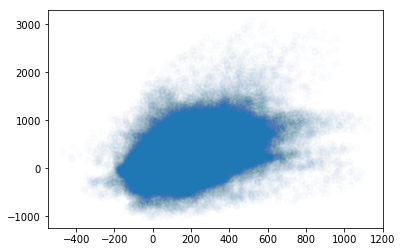

In [13]:
plt.scatter(real,pred,alpha=0.01)

(0.43462827468876153, 0.0)


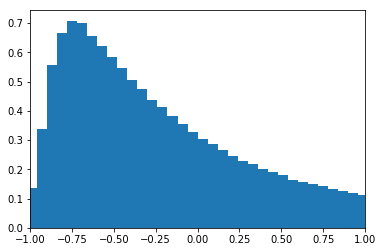

In [17]:
model = Sequential()
model.add(Dense(300, activation='relu', kernel_initializer='normal',input_dim=7))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'local_vdrift_weights.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_test_norm[:,92:99])
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_test.reshape(-1)
#pred = np.maximum(pred,0)
#pred = np.minimum(pred,1.5)
#a = real.copy()
#pred = pred[(a<10) & (a>-10)]
#real = real[(a<10) & (a>-10)]
print(scipy.stats.pearsonr(pred,real))

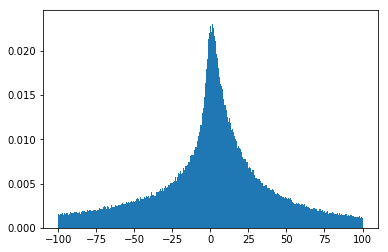

In [20]:
y_predict = model.predict(X_test_norm[:,92:99])
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))
errpd = plt.hist(error_percent,1000,range=(-100, 100), normed=True)
#plt.xlim([-1, 1])

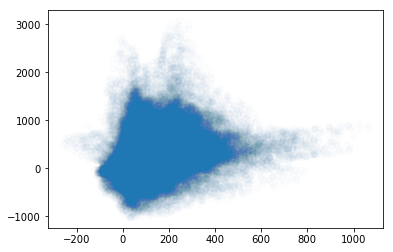

In [16]:
plt.scatter(real,pred,alpha=0.01)

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=5))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.003)
model.compile(loss='mean_absolute_error', optimizer=adam)
save_file = 'version2_small_local.hdf5'
#model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=True)
model.fit(X_train_norm[:,np.array([0,53,54,55,56 ])], y_train, batch_size=512, epochs=15, verbose=1, validation_data=(X_dev_norm[:,np.array([0,53,54,55,56 ])], y_dev), callbacks=[checkpointer])

In [ ]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'vdrift_weights.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_train_norm)
error_percent = (y_predict.reshape(-1)- y_train.reshape(-1))/y_train.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_train.reshape(-1)
#pred = np.maximum(pred,0)
#pred = np.minimum(pred,1.5)
#a = real.copy()
#pred = pred[(a<10) & (a>-10)]
#real = real[(a<10) & (a>-10)]
print(scipy.stats.pearsonr(pred,real))

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_train_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'weights_Uslip3'+ data_signature1 + '.hdf5'
model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=1000, epochs=40, verbose=1, validation_data=(X_realCV_norm, y_realCV), callbacks=[checkpointer])

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("drag2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
data_signature1

In [ ]:
model.predict(np.array([[2.70287, 0.0280261, 1.23125, -0.769839, 2.70308, 0.0279703, 1.23075, -0.769849, 2.70327, 0.0278884, 1.23002, -0.769865, 2.70358, 0.0282558, 1.23087, -0.769851, 2.70378, 0.0281992, 1.23037, -0.769862, 2.70398, 0.0281165, 1.22965, -0.769879, 2.7043, 0.0284953, 1.23039, -0.769917, 2.70451, 0.0284387, 1.2299, -0.76993, 2.70471, 0.0283554, 1.22919, -0.769949, 2.70326, 0.0279363, 1.23085, -0.769817, 2.70346, 0.027879, 1.23035, -0.769827, 2.70366, 0.027796, 1.22961, -0.769845, 2.70396, 0.0281659, 1.23047, -0.769828, 2.70417, 0.0281084, 1.22998, -0.76984, 2.70437, 0.0280249, 1.22925, -0.769858, 2.70468, 0.0284036, 1.22999, -0.769895, 2.70489, 0.0283462, 1.22951, -0.769908, 2.70509, 0.0282624, 1.22879, -0.769928, 2.70362, 0.0278401, 1.2305, -0.769814, 2.70383, 0.0277819, 1.22999, -0.769825, 2.70403, 0.0276979, 1.22925, -0.769844, 2.70432, 0.028069, 1.23012, -0.769824, 2.70453, 0.0280113, 1.22962, -0.769836, 2.70473, 0.0279274, 1.22889, -0.769856, 2.70504, 0.0283043, 1.22965, -0.769891, 2.70525, 0.028247, 1.22915, -0.769905, 2.70545, 0.0281631, 1.22843, -0.769926]]))

In [ ]:
a = np.array([[-1.16182, 0.0280261, 1.23125, -0.769839, -1.16181, 0.0279703, 1.23075, -0.769849, -1.16182, 0.0278884, 1.23002, -0.769865, -1.16182, 0.0282558, 1.23087, -0.769851, -1.16182, 0.0281992, 1.23037, -0.769862, -1.16183, 0.0281165, 1.22965, -0.769879, -1.16177, 0.0284953, 1.23039, -0.769917, -1.16177, 0.0284387, 1.2299, -0.76993, -1.16178, 0.0283554, 1.22919, -0.769949, -1.16171, 0.0279363, 1.23085, -0.769817, -1.16171, 0.027879, 1.23035, -0.769827, -1.16171, 0.027796, 1.22961, -0.769845, -1.16171, 0.0281659, 1.23047, -0.769828, -1.16171, 0.0281084, 1.22998, -0.76984, -1.16172, 0.0280249, 1.22925, -0.769858, -1.16166, 0.0284036, 1.22999, -0.769895, -1.16166, 0.0283462, 1.22951, -0.769908, -1.16167, 0.0282624, 1.22879, -0.769928, -1.16162, 0.0278401, 1.2305, -0.769814, -1.16161, 0.0277819, 1.22999, -0.769825, -1.16162, 0.0276979, 1.22925, -0.769844, -1.16161, 0.028069, 1.23012, -0.769824, -1.16161, 0.0280113, 1.22962, -0.769836, -1.16162, 0.0279274, 1.22889, -0.769856, -1.16156, 0.0283043, 1.22965, -0.769891, -1.16156, 0.028247, 1.22915, -0.769905, -1.16157, 0.0281631, 1.22843, -0.769926]])

In [ ]:
model.predict(a)

In [ ]:
model = Sequential()

model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_train_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'weights_Uslip3'+ data_signature1 + '.hdf5'
model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=1000, epochs=40, verbose=1, validation_data=(X_realCV_norm, y_realCV), callbacks=[checkpointer])

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("drag2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=108))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('relu'))

model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'weights_Uslip3'+ data_signature1 + '.hdf5'
model.load_weights(save_file)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("drag_correct.json", "w") as json_file:
    json_file.write(model_json)